# Data Science 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Essential Questions
### 1. What are some of the first things you notice about this data set? What is in it?
### 2. Using this data, please answer the question-  does genre usage shift week-to-week 
(relative to when a user first used the service)?  For example, are users more likely to play Fingerprint during week one of their subscription, but then Mashboard during week 2 and 3? 
### 3. How would you improve the service by improving customer engagement? 

In [2]:
# load the data # default index_col=None

### 1.  What are some of the first things you notice about this data set? What is in it?
I notice : 
* raw data shape: (134950, 4)
* raw data type
* 6 different genres
* unique user id: 2798
    - users play many times
* First_Play_Date: 01/07 to 01/13 only 2weeks
* Play_Date: 01/08 to 02/09 5 weeks 

Comment:
- Needed to add count column for data analysis
- Discovery and Fingerprint in Genre are mostly played: 94%
- Others in Genre have only 6%
- Needed to focus on two genres: Discovery and Fingerprint
- Week 3 and Week 4 have 55% of total number of playes. 
- After week 3, total number of playes went down dramatically.
- Skew to right of total number of playes by users distribution: There are some outliers

In [3]:
# check the shape and see first 5 data
print(raw.shape)
raw.head()

(134950, 4)


,ID,First_Play_Date,Play_Date,Genre
0,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery
1,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery
2,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery
3,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery
4,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134950 entries, 0 to 134949
Data columns (total 4 columns):
ID                 134950 non-null object
First_Play_Date    134950 non-null datetime64[ns]
Play_Date          134950 non-null datetime64[ns]
Genre              134950 non-null object
dtypes: datetime64[ns](2), object(2)
memory usage: 4.1+ MB


## Data Description
* All Non Null data set 
* ID: User ID / type(object(str)) 
* First_Play_Date: date user first used service / type(datetime)
* Play_Date: date of play/stream / type(datetime)
* Genre: genre of portal being played / type(object(str))


In [5]:
# unique User ID: 2798
raw['ID'].unique().shape

(2798,)

In [6]:
# Genre: 6
# 'Discovery', 'Fingerprint', 'Bullseye', 'Spider', 'Mashboard','Product'
raw['Genre'].unique()

array(['Discovery', 'Fingerprint', 'Bullseye', 'Spider', 'Mashboard',
       'Product'], dtype=object)

In [7]:
raw.head()

,ID,First_Play_Date,Play_Date,Genre
0,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery
1,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery
2,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery
3,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery
4,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery


In [8]:
raw.tail()

,ID,First_Play_Date,Play_Date,Genre
134945,WMT-eb43dc75-8c60-487c-9615-4e750042a0e3-26930...,2015-01-08,2015-02-04,Discovery
134946,WMT-eb43dc75-8c60-487c-9615-4e750042a0e3-26930...,2015-01-08,2015-02-04,Discovery
134947,WMT-eb43dc75-8c60-487c-9615-4e750042a0e3-26930...,2015-01-08,2015-02-04,Discovery
134948,WMT-eb43dc75-8c60-487c-9615-4e750042a0e3-26930...,2015-01-08,2015-02-04,Discovery
134949,WMT-eb43dc75-8c60-487c-9615-4e750042a0e3-26930...,2015-01-08,2015-02-04,Discovery


In [9]:
print(raw["First_Play_Date"].head(1), raw["First_Play_Date"].tail(1))

0   2015-01-08
Name: First_Play_Date, dtype: datetime64[ns] 134949   2015-01-08
Name: First_Play_Date, dtype: datetime64[ns]


In [10]:
# 01/07 -> 01/13
raw['First_Play_Date'].unique()

array(['2015-01-08T00:00:00.000000000', '2015-01-10T00:00:00.000000000',
       '2015-01-07T00:00:00.000000000', '2015-01-13T00:00:00.000000000',
       '2015-01-12T00:00:00.000000000', '2015-01-11T00:00:00.000000000',
       '2015-01-09T00:00:00.000000000'], dtype='datetime64[ns]')

In [11]:
# 34 
# 01/08 -> 02/09
raw['Play_Date'].unique().shape

(34,)

In [12]:
df = raw.copy()


In [13]:
df['count'] = 1

In [14]:
# give unique number id 
user_id = df['ID'].unique()
user_id.shape

(2798,)

In [15]:
# make number of user_id
n_user_id = range(user_id.size)
n_user_id

range(0, 2798)

In [16]:
id_zip = zip(user_id, n_user_id)
id_dict = dict(id_zip)


In [17]:
# ID -> unique number id 
df["n_user_id"] = df['ID'].map(id_dict)

In [18]:
"""
sns.distplot(user['rate'], hist=False)
# skew to right 
user.describe()"""

"\nsns.distplot(user['rate'], hist=False)\n# skew to right \nuser.describe()"

In [19]:
df.head()

,ID,First_Play_Date,Play_Date,Genre,count,n_user_id
0,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0
1,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0
2,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0
3,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0
4,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0


In [20]:
# df_genre
df_genre = df.pivot_table(index="Genre", values='count', aggfunc="sum").reset_index().sort_values(by="count", ascending=False)
df_genre['rate'] = df_genre['count'] / df_genre['count'].sum()
df_genre

,Genre,count,rate
1,Discovery,105489,0.781690
2,Fingerprint,21802,0.161556
4,Product,2711,0.020089
3,Mashboard,2339,0.017332
5,Spider,1426,0.010567
0,Bullseye,1183,0.008766


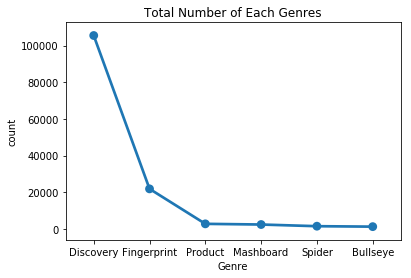

In [21]:
#Plot
sns.pointplot(data=df_genre, x="Genre", y="count")
ax = plt.gca()
ax.set_title("Total Number of Each Genres")
plt.savefig("Total_Genre_count.png")


In [22]:
# add week number columns from Fisrt_Play_Date and Play_Date
# use this information to separate data by each week
df['first_week_n'] = df.First_Play_Date.dt.week
df['play_week_n'] = df.Play_Date.dt.week

In [23]:
# df_week
df_week = df.pivot_table(index="play_week_n", values='count', aggfunc="sum")
df_week['rate'] = df_week['count'] / df_week['count'].sum()
df_week

,count,rate
play_week_n,,
2,19608,0.145298
3,44765,0.331715
4,30286,0.224424
5,24693,0.182979
6,15130,0.112116
7,468,0.003468


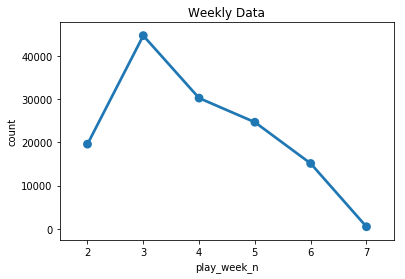

In [24]:
# plot it by weekly 
sns.pointplot(data=df_week, x=df_week.index, y="count")
ax = plt.gca()
ax.set_title("Weekly Data")
plt.savefig("Total_weekly_count.png")

In [25]:
# df_user
df_user =df.pivot_table(index="n_user_id", values='count', aggfunc="sum").sort_values(by="count", ascending=False).reset_index()
df_user['rate'] = df_user['count'] / df_user['count'].sum()
df_user.describe()[["count","rate"]]

,count,rate
count,2798.000000,2798.000000
mean,48.230879,0.000357
std,59.041852,0.000438
min,1.000000,0.000007
25%,10.000000,0.000074
50%,29.000000,0.000215
75%,65.750000,0.000487
max,1096.000000,0.008122


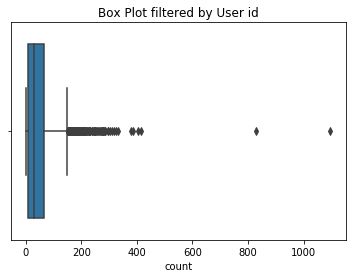

In [26]:
# plot it by users
# check outliers 
sns.boxplot(data=df_user, x="count")
ax = plt.gca()
ax.set_title("Box Plot filtered by User id")
plt.savefig("box_plt_total_count_by_user.png")

### 2. Using this data, please answer the question-  does genre usage shift week-to-week (relative to when a user first used the service)?  

Anlaysis Approach:
* We need to check correlation among genres in order to know that genre usage shift week to week
* Start weeks consist of week2 and week3
    - \# of data at week2 is 2.15 times more than week3 
* Both Week 2 and Week 3 have pattern that total number of playes go down.
    - total number of playes starting at week 2 went up when moving to week3. 
    - Week2 and week 3 have similar pattern. 
    - We cannot see correlation in this format since this is not standard data.
    - We need to remove weight of users since some play many times (Outliers)
* Standard data needed for comparing genre usage 
    * Starting at week 2 
        - Discovery & Fingerprint are highly correlated: negative .84 
        - Rate of Discovery decreases by 6% from week 2 to week 6
        - Rate of Fingerprint increases by 6% from week 2 to week 6
        - We can guess that user's preference is likely to move from Disvoer to Fingerprint
    * Starting at week 3
        - Disvoery & Fingerprint are highly correlated as well: negative .85
        - Rate of Discovery continuously decreases up to 59% from 73%
        - Rate of Fingerprint continuously increases up to 28% from 20%
        - We can guess that user's preference is likely to move from Disvoer to Fingerprint as well

### Starting at week 2

In [27]:
# week 2 and 3
print("week2 is ",92153 /42797, "times more than week 3")
df.first_week_n.value_counts()

week2 is  2.153258405963035 times more than week 3


2    92153
3    42797
Name: first_week_n, dtype: int64

In [28]:
# split week 2 and 3 
week_two = df[df['first_week_n']==2]
week_three = df[df['first_week_n']==3]

In [29]:
print(week_two.shape, week_three.shape)
len(week_two) / len(week_three) # 2.15 times more than week 3 
# 2nd week, more users join the game 

(92153, 8) (42797, 8)


2.153258405963035

In [30]:
# ratio function generates ratio and change of rate
def ratio(row):
    row['ratio'] = row['count']  / row['count'].sum()
    for num in range(len(row)):
        if num < len(row) - 1 :
            row.loc[num + 1,'percent_of_change'] = (row.loc[num+1, 'count'] - row.loc[num, 'count']) / row.loc[num,'count']
            row.loc[num + 1, 'change'] = row.loc[num + 1, 'count'] - row.loc[num,'count']

    return row

In [31]:
# check rate by genre starting at 2week
genre_week_two = pd.DataFrame(week_two.groupby('Genre')['count'].sum()).reset_index().sort_values(by="count",ascending=False)
genre_week_two['rate'] = genre_week_two['count'] / genre_week_two['count'].sum()
genre_week_two

,Genre,count,rate
1,Discovery,71576,0.776708
2,Fingerprint,15130,0.164183
4,Product,1998,0.021681
3,Mashboard,1729,0.018762
5,Spider,937,0.010168
0,Bullseye,783,0.008497


In [32]:
week_two_table=pd.DataFrame(week_two.groupby('play_week_n')['count'].sum()).reset_index()
ratio(week_two_table)
week_two_table
# week two total and ratio 

,play_week_n,count,ratio,percent_of_change,change
0,2,19608,0.212777,NaN,NaN
1,3,28670,0.311113,0.462158,9062.0
2,4,19429,0.210834,-0.322323,-9241.0
3,5,16281,0.176674,-0.162026,-3148.0
4,6,8165,0.088603,-0.498495,-8116.0


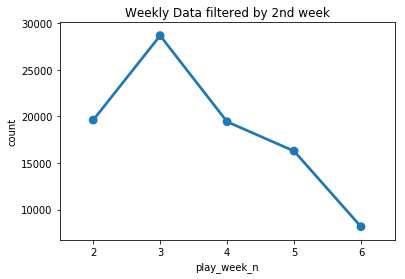

In [33]:
# plot it by weekly with only 2week data 
sns.pointplot(data=week_two_table, x="play_week_n", y="count")
ax = plt.gca()
ax.set_title("Weekly Data filtered by 2nd week")
plt.savefig('plt_ratio_2ndweek.png')

In [34]:
#df.groupby(["play_week_n",'Genre']).sum()
week_two_table = pd.pivot_table(data=week_two, index=["play_week_n",'Genre'], values='count', aggfunc='sum').reset_index()

In [35]:
total_genre=week_two_table.groupby("Genre").sum()

In [36]:
total_genre

,play_week_n,count
Genre,,
Bullseye,20,783
Discovery,20,71576
Fingerprint,20,15130
Mashboard,20,1729
Product,20,1998
Spider,20,937


In [37]:
change_of_ratio = week_two_table.groupby(["Genre","play_week_n"]).sum()

In [38]:
week_two_table.head()

,play_week_n,Genre,count
0,2,Bullseye,170
1,2,Discovery,14643
2,2,Fingerprint,3532
3,2,Mashboard,497
4,2,Product,627


In [39]:
def percent_of_change(row):
    for num in range(5):
        if num < len(row) - 1 :
            row.loc[num + 1,'percent_of_change'] = (row.loc[num+1, 'count'] - row.loc[num, 'count']) / row.loc[num,'count']
    return row

In [40]:
week_two_table[week_two_table["Genre"] == 'Bullseye'].reset_index()

,index,play_week_n,Genre,count
0,0,2,Bullseye,170
1,6,3,Bullseye,227
2,12,4,Bullseye,199
3,18,5,Bullseye,108
4,24,6,Bullseye,79


In [41]:
week_two_table["Genre"].unique()

array(['Bullseye', 'Discovery', 'Fingerprint', 'Mashboard', 'Product',
       'Spider'], dtype=object)

In [42]:
bull=percent_of_change(week_two_table[week_two_table["Genre"] == 'Bullseye'].reset_index(drop="index"))
Discovery=percent_of_change(week_two_table[week_two_table["Genre"] == 'Discovery'].reset_index(drop="index"))
Fingerprint=percent_of_change(week_two_table[week_two_table["Genre"] == 'Fingerprint'].reset_index(drop="index"))
Mashboard=percent_of_change(week_two_table[week_two_table["Genre"] == 'Mashboard'].reset_index(drop="index"))
Product=percent_of_change(week_two_table[week_two_table["Genre"] == 'Product'].reset_index(drop="index"))
Spider=percent_of_change(week_two_table[week_two_table["Genre"] == 'Spider'].reset_index(drop="index"))

In [43]:
change_of_ratio_2nd_week=pd.concat([bull, Discovery, Fingerprint, Mashboard, Product, Spider]).reset_index(drop="index")

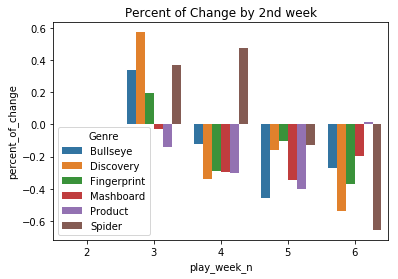

In [44]:
# week two visualization
sns.barplot(data=change_of_ratio_2nd_week, y='percent_of_change', x="play_week_n", hue= "Genre")
ax = plt.gca()
ax.set_title("Percent of Change by 2nd week")
plt.savefig("2ndweek_percent_of_change.png")

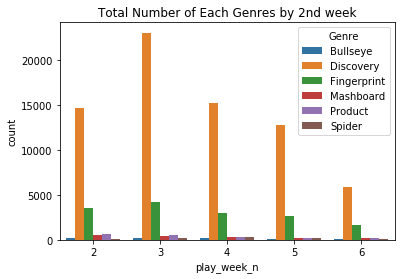

In [45]:
# week two visualization
sns.barplot(data=week_two_table, y='count', x="play_week_n", hue= "Genre")
ax = plt.gca()
ax.set_title("Total Number of Each Genres by 2nd week")
plt.savefig('plt_weekly_Genre_2nd_week.png')

### Starting at  Week 3 

In [46]:
genre_week_three = pd.DataFrame(week_three.groupby('Genre')['count'].sum()).reset_index().sort_values(by="count",ascending=False)
genre_week_three['rate'] = genre_week_three['count'] / genre_week_three['count'].sum()
genre_week_three

,Genre,count,rate
1,Discovery,33913,0.792415
2,Fingerprint,6672,0.155899
4,Product,713,0.016660
3,Mashboard,610,0.014253
5,Spider,489,0.011426
0,Bullseye,400,0.009346


In [47]:
week_three_table=pd.DataFrame(week_three.groupby('play_week_n')['count'].sum()).reset_index()
ratio(week_three_table)
print("total played: ", week_three['count'].sum())
week_three_table

total played:  42797


,play_week_n,count,ratio,percent_of_change,change
0,3,16095,0.376078,NaN,NaN
1,4,10857,0.253686,-0.325443,-5238.0
2,5,8412,0.196556,-0.225200,-2445.0
3,6,6965,0.162745,-0.172016,-1447.0
4,7,468,0.010935,-0.932807,-6497.0


In [48]:
# week three
#df.groupby(["play_week_n",'Genre']).sum()
week_three_table =pd.pivot_table(data=week_three, index=["play_week_n",'Genre'], values='count', aggfunc='sum').reset_index()
pd.pivot_table(data=week_three, index=["play_week_n",'Genre'], values='count', aggfunc='sum').head(12)

count
play_week_n Genre             
3           Bullseye       161
            Discovery    12759
            Fingerprint   2468
            Mashboard      258
            Product        326
            Spider         123
4           Bullseye        81
            Discovery     8973
            Fingerprint   1437
            Mashboard       91
            Product        155
            Spider         120

In [49]:
week_three_table.head(6)['count'].sum()
# 3 -> 3 total: 16095

16095

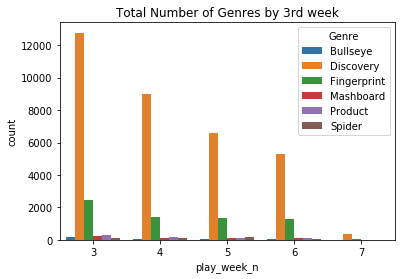

In [50]:
# week three visualization
sns.barplot(data=week_three_table, y='count', x="play_week_n", hue= "Genre")
ax = plt.gca()
ax.set_title("Total Number of Genres by 3rd week")
# never goes up 
plt.savefig('plt_Genre_by_3rd_week.png')

In [51]:
bull=percent_of_change(week_three_table[week_two_table["Genre"] == 'Bullseye'].reset_index(drop="index"))
Discovery=percent_of_change(week_three_table[week_two_table["Genre"] == 'Discovery'].reset_index(drop="index"))
Fingerprint=percent_of_change(week_three_table[week_two_table["Genre"] == 'Fingerprint'].reset_index(drop="index"))
Mashboard=percent_of_change(week_three_table[week_two_table["Genre"] == 'Mashboard'].reset_index(drop="index"))
Product=percent_of_change(week_three_table[week_two_table["Genre"] == 'Product'].reset_index(drop="index"))
Spider=percent_of_change(week_three_table[week_two_table["Genre"] == 'Spider'].reset_index(drop="index"))

In [52]:
change_of_ratio_3rd_week=pd.concat([bull, Discovery, Fingerprint, Mashboard, Product, Spider]).reset_index(drop="index")

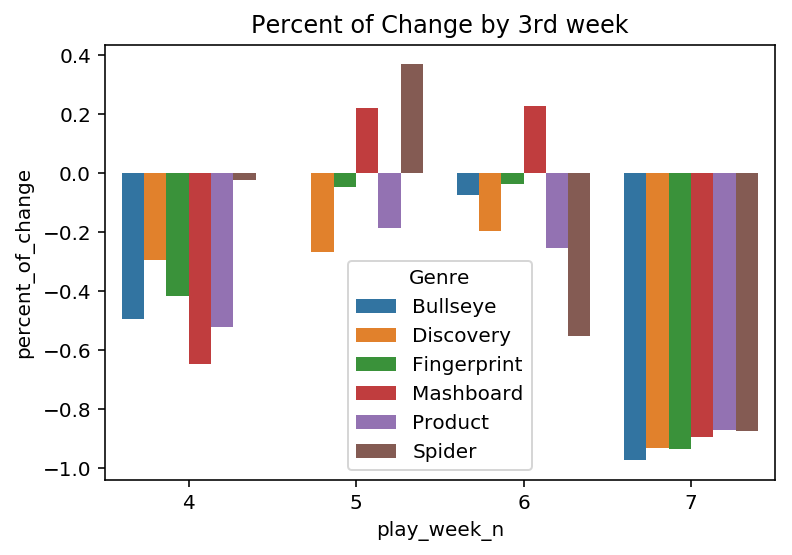

In [127]:
# week three visualization
sns.barplot(data=change_of_ratio_3rd_week[change_of_ratio_3rd_week["play_week_n"] != 3], y='percent_of_change', x="play_week_n", hue= "Genre")
ax = plt.gca()
ax.set_title("Percent of Change by 3rd week")
plt.savefig("3rdweek_percent_of_change.png")

In [54]:
bull_three = week_three_table.iloc[[0,6,12,18,24]]
bull_three.index = range(len(bull_three)) # reset_index()
ratio(bull_three)
bull_three
#never up

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,play_week_n,Genre,count,ratio,percent_of_change,change
0,3,Bullseye,161,0.4025,NaN,NaN
1,4,Bullseye,81,0.2025,-0.496894,-80.0
2,5,Bullseye,81,0.2025,0.000000,0.0
3,6,Bullseye,75,0.1875,-0.074074,-6.0
4,7,Bullseye,2,0.0050,-0.973333,-73.0


In [55]:
dis_three = week_three_table.iloc[[1,7,13,19,25]]
dis_three.index = range(len(dis_three)) # reset_index()
ratio(dis_three)
dis_three
# never up

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,play_week_n,Genre,count,ratio,percent_of_change,change
0,3,Discovery,12759,0.376227,NaN,NaN
1,4,Discovery,8973,0.264589,-0.296732,-3786.0
2,5,Discovery,6562,0.193495,-0.268695,-2411.0
3,6,Discovery,5271,0.155427,-0.196739,-1291.0
4,7,Discovery,348,0.010262,-0.933978,-4923.0


In [56]:
finger_three = week_three_table.iloc[[2,8,14,20,26]]
finger_three.index = range(len(finger_three)) # reset_index()
ratio(finger_three)
finger_three

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,play_week_n,Genre,count,ratio,percent_of_change,change
0,3,Fingerprint,2468,0.369904,NaN,NaN
1,4,Fingerprint,1437,0.215378,-0.417747,-1031.0
2,5,Fingerprint,1368,0.205036,-0.048017,-69.0
3,6,Fingerprint,1316,0.197242,-0.038012,-52.0
4,7,Fingerprint,83,0.012440,-0.936930,-1233.0


In [57]:
mash_three = week_three_table.iloc[[3,9,15,21,27]]
mash_three.index = range(len(mash_three)) # reset_index()
ratio(mash_three)
mash_three

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,play_week_n,Genre,count,ratio,percent_of_change,change
0,3,Mashboard,258,0.422951,NaN,NaN
1,4,Mashboard,91,0.149180,-0.647287,-167.0
2,5,Mashboard,111,0.181967,0.219780,20.0
3,6,Mashboard,136,0.222951,0.225225,25.0
4,7,Mashboard,14,0.022951,-0.897059,-122.0


In [58]:
product_three = week_three_table.iloc[[4,10,16,22,28]]
product_three.index = range(len(product_three)) # reset_index()
ratio(product_three)
product_three

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,play_week_n,Genre,count,ratio,percent_of_change,change
0,3,Product,326,0.457223,NaN,NaN
1,4,Product,155,0.217391,-0.524540,-171.0
2,5,Product,126,0.176718,-0.187097,-29.0
3,6,Product,94,0.131837,-0.253968,-32.0
4,7,Product,12,0.016830,-0.872340,-82.0


In [59]:
spider_three = week_three_table.iloc[[5,11,17,23,29]]
spider_three.index = range(len(spider_three)) # reset_index()
ratio(spider_three)
spider_three

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,play_week_n,Genre,count,ratio,percent_of_change,change
0,3,Spider,123,0.251534,NaN,NaN
1,4,Spider,120,0.245399,-0.024390,-3.0
2,5,Spider,164,0.335378,0.366667,44.0
3,6,Spider,73,0.149284,-0.554878,-91.0
4,7,Spider,9,0.018405,-0.876712,-64.0


In [60]:
week_three_genre = ( dis_three.merge(finger_three, on ="play_week_n")
 .merge(mash_three, on="play_week_n")
 .merge(product_three, on="play_week_n")
 .merge(spider_three, on="play_week_n")
 .merge(bull_three, on="play_week_n") )

In [61]:
week_three_genre

,play_week_n,Genre_x,count_x,ratio_x,percent_of_change_x,change_x,Genre_y,count_y,ratio_y,percent_of_change_y,...,Genre_x,count_x,ratio_x,percent_of_change_x,change_x,Genre_y,count_y,ratio_y,percent_of_change_y,change_y
0,3,Discovery,12759,0.376227,NaN,NaN,Fingerprint,2468,0.369904,NaN,...,Spider,123,0.251534,NaN,NaN,Bullseye,161,0.4025,NaN,NaN
1,4,Discovery,8973,0.264589,-0.296732,-3786.0,Fingerprint,1437,0.215378,-0.417747,...,Spider,120,0.245399,-0.024390,-3.0,Bullseye,81,0.2025,-0.496894,-80.0
2,5,Discovery,6562,0.193495,-0.268695,-2411.0,Fingerprint,1368,0.205036,-0.048017,...,Spider,164,0.335378,0.366667,44.0,Bullseye,81,0.2025,0.000000,0.0
3,6,Discovery,5271,0.155427,-0.196739,-1291.0,Fingerprint,1316,0.197242,-0.038012,...,Spider,73,0.149284,-0.554878,-91.0,Bullseye,75,0.1875,-0.074074,-6.0
4,7,Discovery,348,0.010262,-0.933978,-4923.0,Fingerprint,83,0.012440,-0.936930,...,Spider,9,0.018405,-0.876712,-64.0,Bullseye,2,0.0050,-0.973333,-73.0


In [62]:
# comment: dramatically decreasing 

## Standard data by genre usage starting at week 2 and week3

### Starting at Week 2

In [63]:
# get week two by user
# 2798
print(week_two.n_user_id.unique().shape)
# 1894


(1894,)


In [64]:
week_two.head()

,ID,First_Play_Date,Play_Date,Genre,count,n_user_id,first_week_n,play_week_n
0,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0,2,2
1,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0,2,2
2,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0,2,2
3,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0,2,2
4,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0,2,2


In [65]:
# add is_week_changed column by user id  and check how many weeks does each users play 

user_week_two = pd.DataFrame(week_two.groupby(['n_user_id', 'play_week_n','Genre'])['count'].sum())
user_week_two.reset_index(inplace=True)
user_week_two['is_week_changed'] = user_week_two.groupby(['n_user_id'])['play_week_n'].shift(-1)
user_week_two['is_week_changed'] = (user_week_two['is_week_changed'] - user_week_two['play_week_n']).fillna(0)
user_week_two.loc[user_week_two['is_week_changed'] == 1, 'is_week_changed'] =True
user_week_two.loc[~(user_week_two['is_week_changed'] == 1), 'is_week_changed'] =False
user_week_two['is_week_changed'] = user_week_two['is_week_changed'].shift(1).fillna(False)

In [66]:
user_week_two.head()

,n_user_id,play_week_n,Genre,count,is_week_changed
0,0,2,Discovery,27,False
1,0,3,Bullseye,5,True
2,0,3,Discovery,67,False
3,0,3,Fingerprint,2,False
4,0,3,Spider,1,False


In [67]:
# make new week2 table by user id and play week number
# add all genres columns and cout it by user and week number
user_week2 = pd.pivot_table(data=week_two ,index=['n_user_id', 'play_week_n'], columns='Genre',values='count', aggfunc= 'sum').reset_index()
user_week2=user_week2[['n_user_id', 'play_week_n', 'Discovery', 'Fingerprint','Bullseye','Mashboard', 'Product', 'Spider']]
user_week2.head()

Genre,n_user_id,play_week_n,Discovery,Fingerprint,Bullseye,Mashboard,Product,Spider
0,0,2,27.0,NaN,NaN,NaN,NaN,NaN
1,0,3,67.0,2.0,5.0,NaN,NaN,1.0
2,0,4,39.0,10.0,1.0,NaN,NaN,2.0
3,0,5,26.0,1.0,NaN,NaN,NaN,NaN
4,0,6,31.0,NaN,NaN,NaN,NaN,NaN


In [68]:
# save 5 different genres data as array
# it will be used for for loop
genre_index =user_week_two['Genre'].unique()

In [69]:
# replace all null vaules as float 0.
for genre in genre_index:
    user_week2.loc[user_week2[f'{genre}'].isnull(), f"{genre}"] = 0.0
user_week2.head()

Genre,n_user_id,play_week_n,Discovery,Fingerprint,Bullseye,Mashboard,Product,Spider
0,0,2,27.0,0.0,0.0,0.0,0.0,0.0
1,0,3,67.0,2.0,5.0,0.0,0.0,1.0
2,0,4,39.0,10.0,1.0,0.0,0.0,2.0
3,0,5,26.0,1.0,0.0,0.0,0.0,0.0
4,0,6,31.0,0.0,0.0,0.0,0.0,0.0


In [70]:
user_week2.iloc[:,2:8].corr()

Genre,Discovery,Fingerprint,Bullseye,Mashboard,Product,Spider
Genre,,,,,,
Discovery,1.000000,0.015461,0.030466,0.031836,-0.009587,0.043228
Fingerprint,0.015461,1.000000,0.064421,0.052387,0.062064,0.071554
Bullseye,0.030466,0.064421,1.000000,0.036466,0.040075,0.056085
Mashboard,0.031836,0.052387,0.036466,1.000000,0.068886,0.074152
Product,-0.009587,0.062064,0.040075,0.068886,1.000000,0.031700
Spider,0.043228,0.071554,0.056085,0.074152,0.031700,1.000000


In [71]:
user_week2.groupby(["play_week_n"])['Discovery', 'Fingerprint','Bullseye','Mashboard', 'Product'].mean()

Genre,Discovery,Fingerprint,Bullseye,Mashboard,Product
play_week_n,,,,,
2,8.690208,2.096142,0.100890,0.294955,0.372107
3,15.222222,2.786376,0.150132,0.320106,0.357143
4,12.260064,2.419485,0.160225,0.275362,0.302738
5,11.397504,2.397504,0.096257,0.200535,0.201426
6,7.405270,2.120452,0.099122,0.227102,0.287327


In [72]:
# covert total number of values into rate (percent) 
# use tqdm package to check progress of for loop since for loop takes a while
# standardize data set by user_week2 data 
# it means to remove the weight of users
# some users play a lot and it causes bias.

from tqdm import tqdm 
for num in tqdm(range(user_week2.shape[0])):
    user_week2.loc[num,'total_n'] = user_week2.iloc[num,2:8].sum()
    user_week2.iloc[num,2:8] = (user_week2.iloc[num,2:8]  / user_week2.iloc[num,8]).round(3)

user_week2.head()

100%|██████████| 6358/6358 [00:18<00:00, 341.06it/s]


Genre,n_user_id,play_week_n,Discovery,Fingerprint,Bullseye,Mashboard,Product,Spider,total_n
0,0,2,1.000,0.000,0.000,0.0,0.0,0.000,27.0
1,0,3,0.893,0.027,0.067,0.0,0.0,0.013,75.0
2,0,4,0.750,0.192,0.019,0.0,0.0,0.038,52.0
3,0,5,0.963,0.037,0.000,0.0,0.0,0.000,27.0
4,0,6,1.000,0.000,0.000,0.0,0.0,0.000,31.0


In [73]:
user_week2.shape

(6358, 9)

Genre        Discovery  Fingerprint  Bullseye  Mashboard   Product    Spider
Genre                                                                       
Discovery     1.000000    -0.837260 -0.156525  -0.251807 -0.263327 -0.177294
Fingerprint  -0.837260     1.000000 -0.045988  -0.069789 -0.072802 -0.039358
Bullseye     -0.156525    -0.045988  1.000000  -0.002240 -0.006125  0.009841
Mashboard    -0.251807    -0.069789 -0.002240   1.000000 -0.023744 -0.022969
Product      -0.263327    -0.072802 -0.006125  -0.023744  1.000000 -0.018980
Spider       -0.177294    -0.039358  0.009841  -0.022969 -0.018980  1.000000


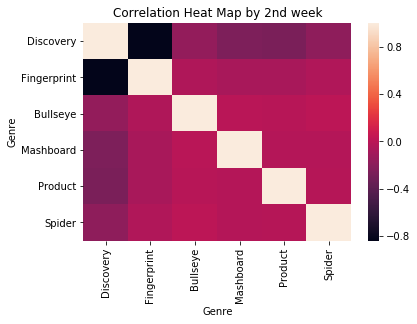

In [74]:
#  check  correlation among 5 genres
#  heat.map helps out to see correlation easily 
#  Disvoery and Fingerprint are highly correlated: - 0.84
#  It is very import information
user_corr = user_week2.iloc[:,2:8].corr()
print(user_corr)
sns.heatmap(user_corr)
ax = plt.gca()
ax.set_title("Correlation Heat Map by 2nd week")
plt.savefig("2nd_corr.png")
# Discovery Fingerprint => They are highly correlated

In [75]:
user_corr

Genre,Discovery,Fingerprint,Bullseye,Mashboard,Product,Spider
Genre,,,,,,
Discovery,1.000000,-0.837260,-0.156525,-0.251807,-0.263327,-0.177294
Fingerprint,-0.837260,1.000000,-0.045988,-0.069789,-0.072802,-0.039358
Bullseye,-0.156525,-0.045988,1.000000,-0.002240,-0.006125,0.009841
Mashboard,-0.251807,-0.069789,-0.002240,1.000000,-0.023744,-0.022969
Product,-0.263327,-0.072802,-0.006125,-0.023744,1.000000,-0.018980
Spider,-0.177294,-0.039358,0.009841,-0.022969,-0.018980,1.000000


In [76]:
import matplotlib as mpl
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

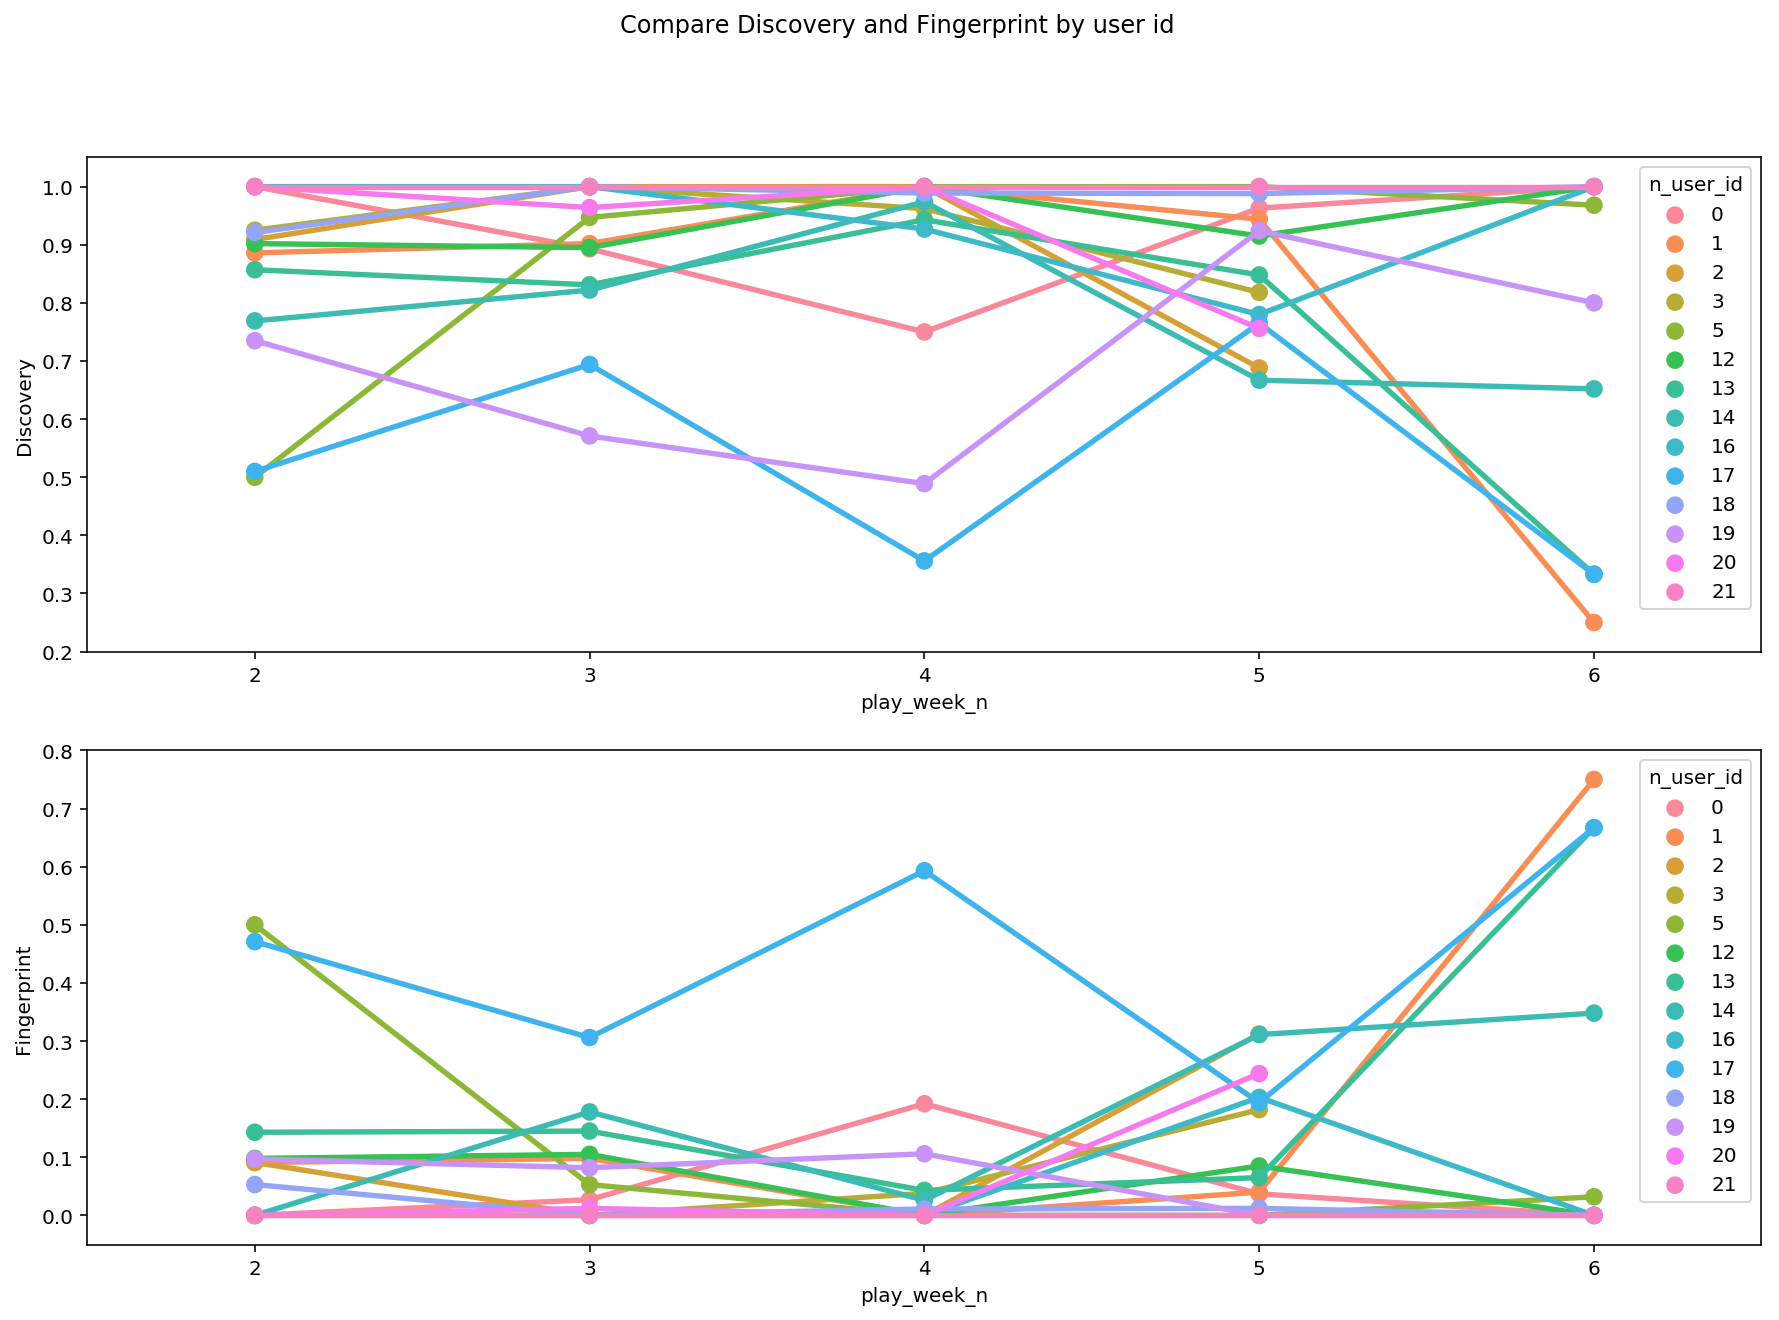

In [77]:
# try to get insight by using the graph 
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Compare Discovery and Fingerprint by user id')
fig.set_size_inches(15,10)
sns.pointplot(data=user_week2.iloc[0:67], x="play_week_n", y="Discovery", hue ="n_user_id", ax=ax1)
sns.pointplot(data=user_week2.iloc[0:67], x="play_week_n", y="Fingerprint", hue ="n_user_id", ax=ax2)

In [78]:
user_week2.head()

Genre,n_user_id,play_week_n,Discovery,Fingerprint,Bullseye,Mashboard,Product,Spider,total_n
0,0,2,1.000,0.000,0.000,0.0,0.0,0.000,27.0
1,0,3,0.893,0.027,0.067,0.0,0.0,0.013,75.0
2,0,4,0.750,0.192,0.019,0.0,0.0,0.038,52.0
3,0,5,0.963,0.037,0.000,0.0,0.0,0.000,27.0
4,0,6,1.000,0.000,0.000,0.0,0.0,0.000,31.0


In [79]:
# data trend by weekly 
week2_trend = user_week2.groupby(["play_week_n"])['Discovery', 'Fingerprint','Bullseye','Mashboard', 'Product'].mean()

week2_trend.head()
# Discovery about 6% down 
# Fingerprint about 6% up
# others don't change. 
# we guess that user are likly to move into Finger from Disvoer as time goes by.

Genre,Discovery,Fingerprint,Bullseye,Mashboard,Product
play_week_n,,,,,
2,0.687763,0.220492,0.012576,0.035721,0.032936
3,0.700948,0.221298,0.011399,0.026377,0.030501
4,0.657275,0.251787,0.014391,0.021475,0.026699
5,0.652985,0.261436,0.010314,0.023535,0.024001
6,0.621871,0.287670,0.013640,0.033289,0.027670


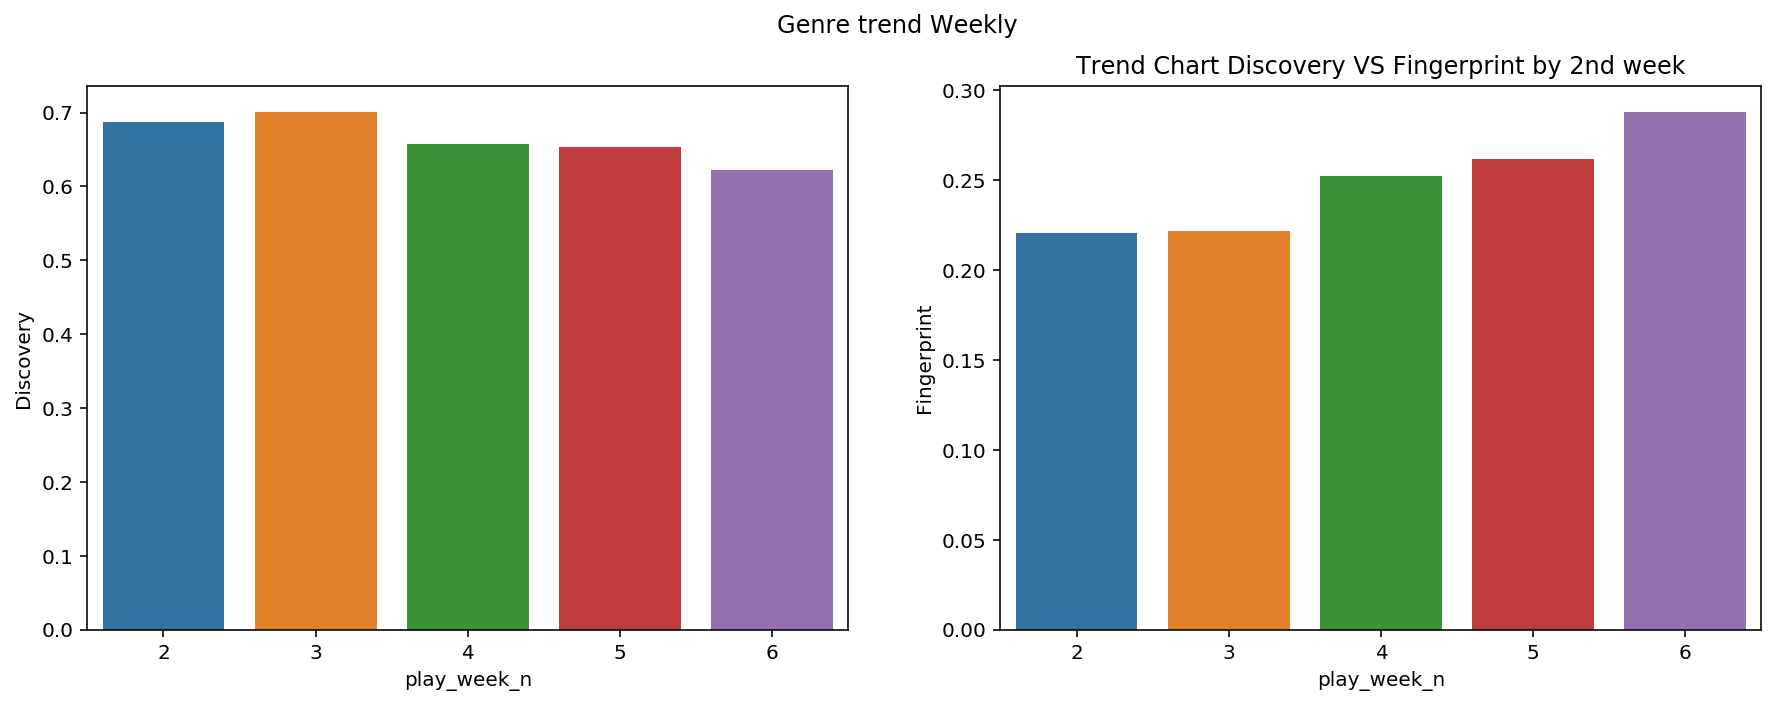

In [80]:
# Trend visualization 
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Genre trend Weekly')
"""ax1.set(ylim=(0, 0.71))
ax2.set(ylim=(0, 0.71))"""
fig.set_size_inches(15,5)
sns.barplot(data=week2_trend, x=week2_trend.index, y="Discovery", ax=ax1 )
sns.barplot(data=week2_trend, x=week2_trend.index, y='Fingerprint', ax=ax2)
# discovery going down , Finger going up.
ax = plt.gca()
ax.set_title("Trend Chart Discovery VS Fingerprint by 2nd week")
plt.savefig("Disvoery_vs_Fingerprint_by_2nd_week.png")

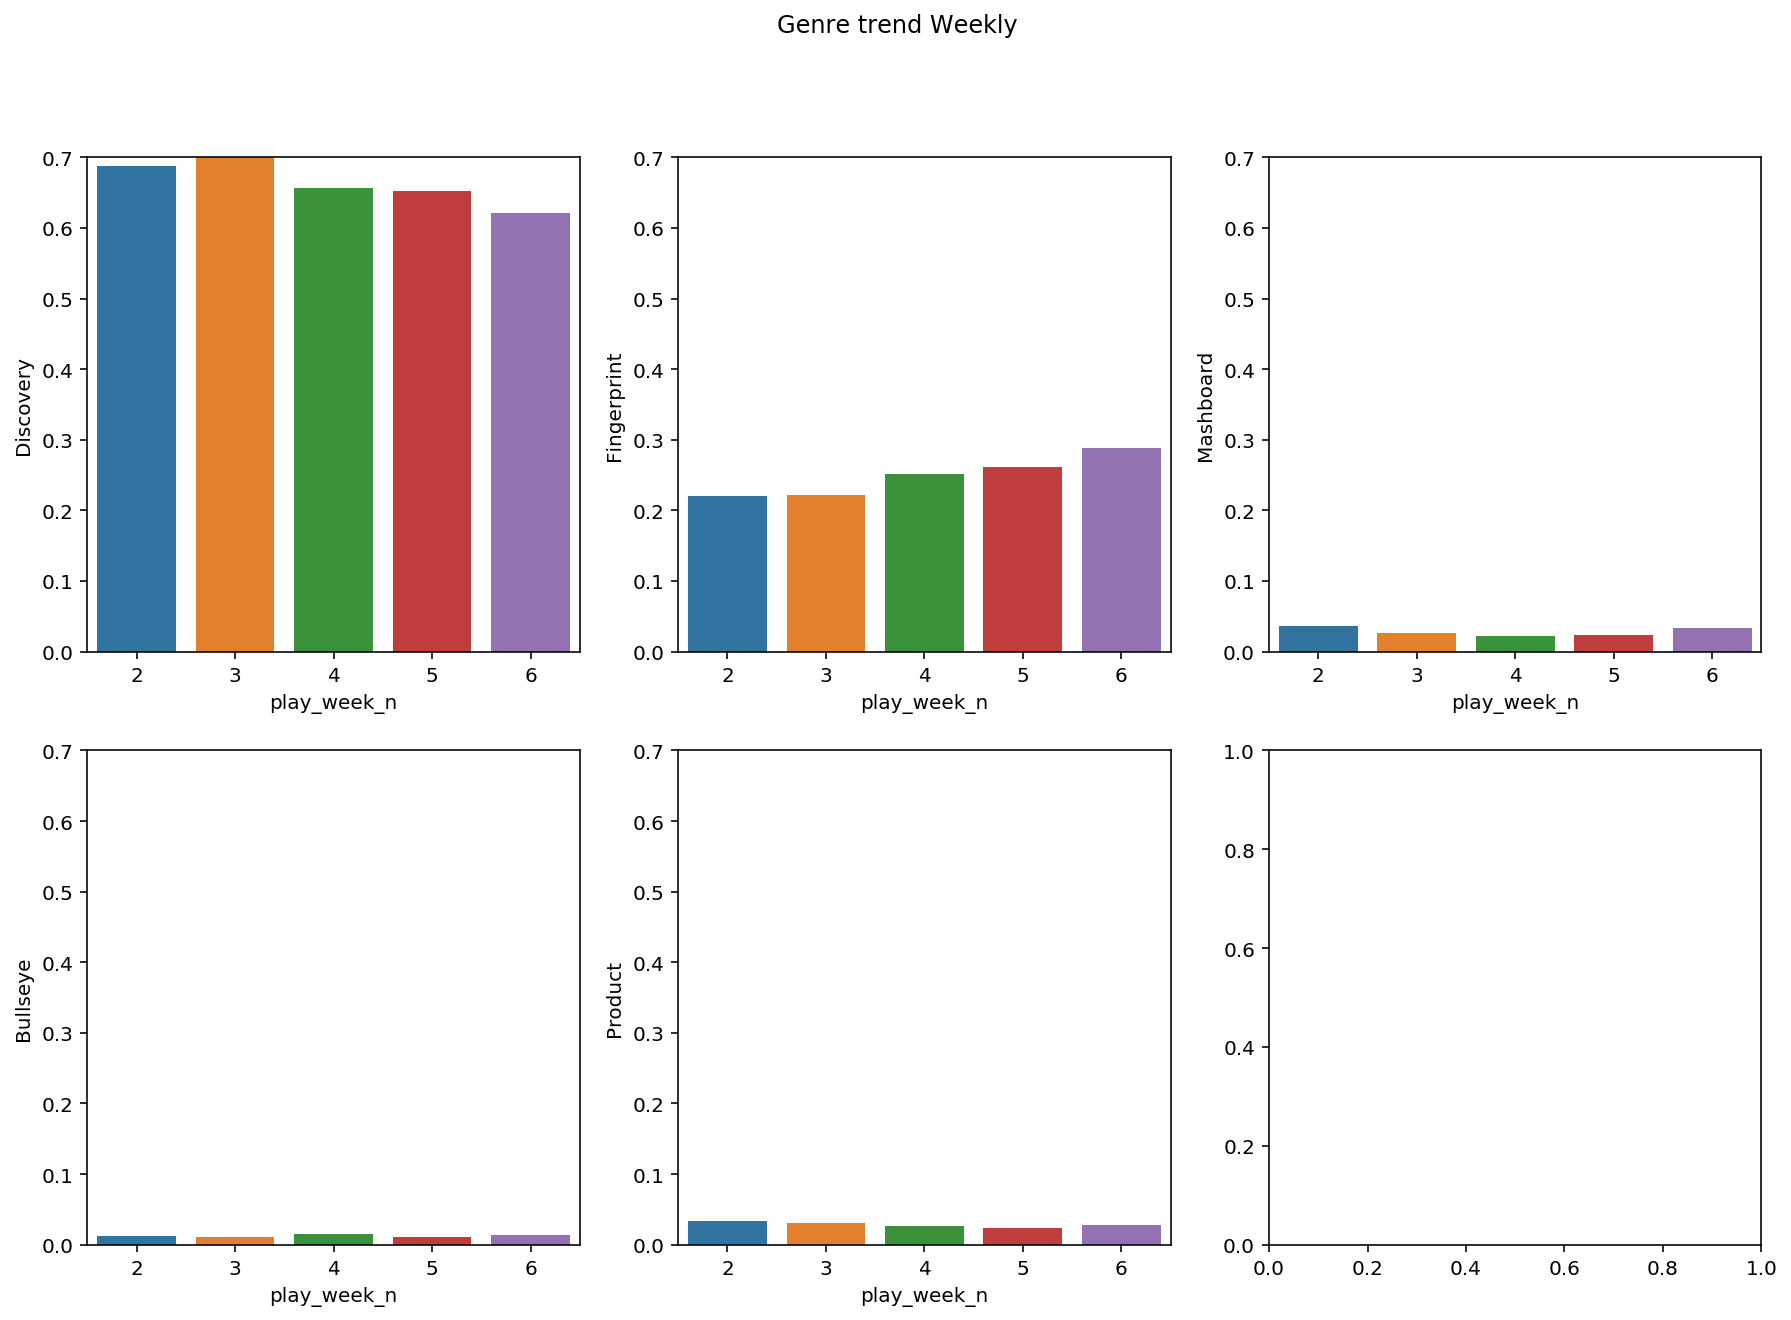

In [81]:
# plot all 
fig, ((ax1, ax2,ax5), (ax3, ax4,ax6)) = plt.subplots(2, 3)
fig.suptitle('Genre trend Weekly')
ax1.set(ylim=(0, 0.7))
ax2.set(ylim=(0, 0.7))
ax3.set(ylim=(0, 0.7))
ax4.set(ylim=(0, 0.7))
ax5.set(ylim=(0, 0.7))
fig.set_size_inches(15,10)
sns.barplot(data=week2_trend, x=week2_trend.index, y="Discovery", ax=ax1 )
sns.barplot(data=week2_trend, x=week2_trend.index, y='Fingerprint', ax=ax2)
sns.barplot(data=week2_trend, x=week2_trend.index, y='Bullseye', ax=ax3)
sns.barplot(data=week2_trend, x=week2_trend.index, y= 'Product', ax=ax4)
sns.barplot(data=week2_trend, x=week2_trend.index, y='Mashboard', ax=ax5)
# discovery going down , Finger going up.
# product going down

### Starting at Week 3

In [82]:
user_week3 = pd.pivot_table(data=week_three ,index=['n_user_id', 'play_week_n'], columns='Genre',values='count', aggfunc= 'sum').reset_index()
user_week3=user_week3[['n_user_id', 'play_week_n', 'Discovery', 'Fingerprint','Bullseye','Mashboard', 'Product', 'Spider']]
user_week3.head()

Genre,n_user_id,play_week_n,Discovery,Fingerprint,Bullseye,Mashboard,Product,Spider
0,4,3,46.0,9.0,1.0,NaN,NaN,NaN
1,4,4,16.0,2.0,NaN,NaN,NaN,NaN
2,4,5,75.0,2.0,NaN,1.0,NaN,NaN
3,4,6,61.0,NaN,1.0,NaN,NaN,NaN
4,4,7,15.0,NaN,NaN,NaN,NaN,NaN


In [83]:
# null to 0 
for genre in genre_index:
    user_week3.loc[user_week3[f'{genre}'].isnull(), f"{genre}"] = 0.0
user_week3.head()

Genre,n_user_id,play_week_n,Discovery,Fingerprint,Bullseye,Mashboard,Product,Spider
0,4,3,46.0,9.0,1.0,0.0,0.0,0.0
1,4,4,16.0,2.0,0.0,0.0,0.0,0.0
2,4,5,75.0,2.0,0.0,1.0,0.0,0.0
3,4,6,61.0,0.0,1.0,0.0,0.0,0.0
4,4,7,15.0,0.0,0.0,0.0,0.0,0.0


In [84]:

# total number -> rate 
# time check 
# standardize data set by n_user_id 
# remove the weight of users
from tqdm import tqdm 
for num in tqdm(range(user_week3.shape[0])):
    user_week3.loc[num,'total_n'] = user_week3.iloc[num,2:8].sum()
    user_week3.iloc[num,2:8] = (user_week3.iloc[num,2:8]  / user_week3.iloc[num,8]).round(3)
user_week3.head()


100%|██████████| 2733/2733 [00:10<00:00, 248.93it/s]


Genre,n_user_id,play_week_n,Discovery,Fingerprint,Bullseye,Mashboard,Product,Spider,total_n
0,4,3,0.821,0.161,0.018,0.000,0.0,0.0,56.0
1,4,4,0.889,0.111,0.000,0.000,0.0,0.0,18.0
2,4,5,0.962,0.026,0.000,0.013,0.0,0.0,78.0
3,4,6,0.984,0.000,0.016,0.000,0.0,0.0,62.0
4,4,7,1.000,0.000,0.000,0.000,0.0,0.0,15.0


In [85]:
user_week3.shape

(2733, 9)

Genre        Discovery  Fingerprint  Bullseye  Mashboard   Product    Spider
Genre                                                                       
Discovery     1.000000    -0.845621 -0.196587  -0.236392 -0.271263 -0.203158
Fingerprint  -0.845621     1.000000 -0.016730  -0.057817 -0.031195 -0.051900
Bullseye     -0.196587    -0.016730  1.000000  -0.000661 -0.017485 -0.004756
Mashboard    -0.236392    -0.057817 -0.000661   1.000000 -0.013053  0.005105
Product      -0.271263    -0.031195 -0.017485  -0.013053  1.000000 -0.021183
Spider       -0.203158    -0.051900 -0.004756   0.005105 -0.021183  1.000000


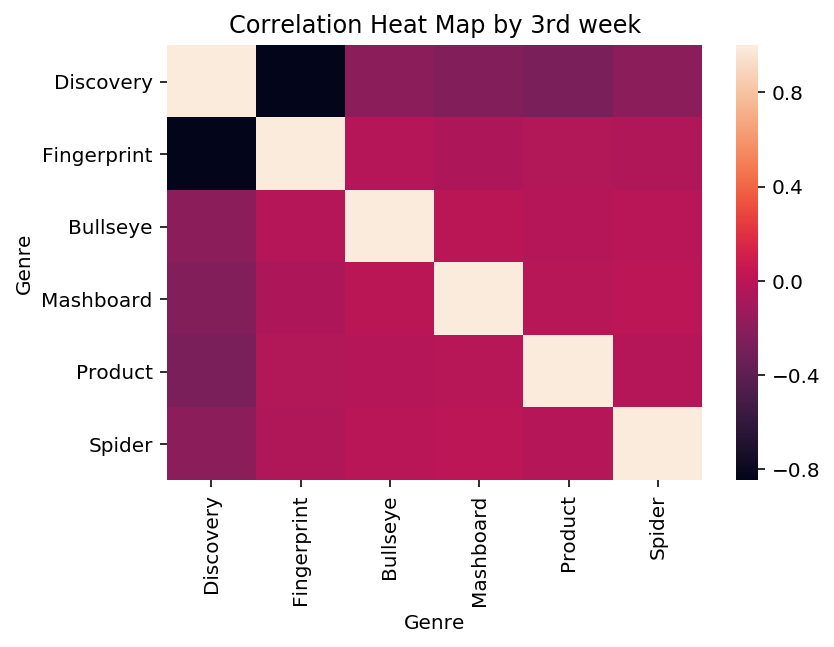

In [86]:
user_corr = user_week3.iloc[:,2:8].corr()
print(user_corr)
sns.heatmap(user_corr)
ax = plt.gca()
ax.set_title("Correlation Heat Map by 3rd week")
plt.savefig("3rd_weekd_corr.png")
# week3 joined users => almost same corr (Discovery & Fingerprint)

In [87]:
user_corr

Genre,Discovery,Fingerprint,Bullseye,Mashboard,Product,Spider
Genre,,,,,,
Discovery,1.000000,-0.845621,-0.196587,-0.236392,-0.271263,-0.203158
Fingerprint,-0.845621,1.000000,-0.016730,-0.057817,-0.031195,-0.051900
Bullseye,-0.196587,-0.016730,1.000000,-0.000661,-0.017485,-0.004756
Mashboard,-0.236392,-0.057817,-0.000661,1.000000,-0.013053,0.005105
Product,-0.271263,-0.031195,-0.017485,-0.013053,1.000000,-0.021183
Spider,-0.203158,-0.051900,-0.004756,0.005105,-0.021183,1.000000


In [88]:
# data trend by weekly 
week3_trend = user_week3.groupby(["play_week_n"])['Discovery', 'Fingerprint','Bullseye','Mashboard', 'Product'].mean()

week3_trend.head()

# Discovery about 14% down 
# Fingerprint about 8%up
# Mashbord about 2%up
# we guess that user are likly to move into Finger from Disvoer as time goes by.

Genre,Discovery,Fingerprint,Bullseye,Mashboard,Product
play_week_n,,,,,
3,0.725832,0.199987,0.013454,0.025076,0.028063
4,0.713599,0.221110,0.011791,0.010820,0.017995
5,0.664819,0.245632,0.016424,0.020528,0.021278
6,0.647832,0.255000,0.019011,0.030055,0.029423
7,0.590685,0.277287,0.013889,0.045889,0.033333


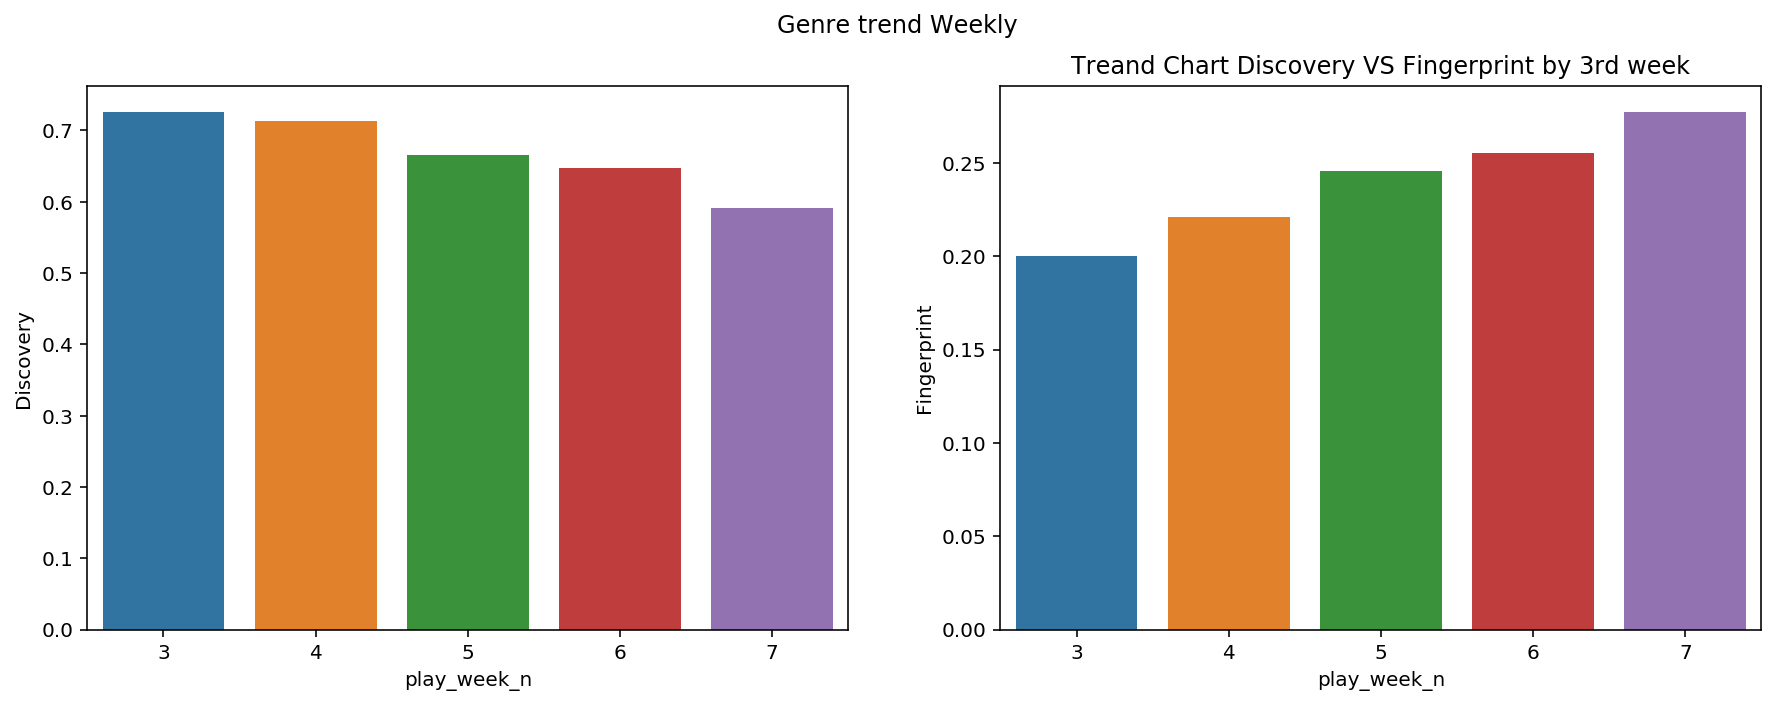

In [89]:
# Trend visualization 
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Genre trend Weekly')
"""ax1.set(ylim=(0, 0.71))
ax2.set(ylim=(0, 0.71))"""
fig.set_size_inches(15,5)
sns.barplot(data=week3_trend, x=week3_trend.index, y="Discovery", ax=ax1 )
sns.barplot(data=week3_trend, x=week3_trend.index, y='Fingerprint', ax=ax2)
# discovery going down , Finger going up.
ax = plt.gca()
ax.set_title("Treand Chart Discovery VS Fingerprint by 3rd week")
plt.savefig("Disvoery_vs_Fingerprint_3rd_week.png")

## 3. How would you improve the service by improving customer engagement?
## Suggestions

*  VVIP & VIP by First_Play_Week: Customers played for 5 weeks & Customers played in top 10%
    - I collected user IDs for VVIP & VIP
    - We can advertise this services by VVIP & VIP through email.
    - We can give discount or rewar VVIP & VIP separately. 

*  Day of Week (Advertisement)
    - Customers are more likely to play the services on cetrain day of week.
    - We can actively advertise this services on that day of week.
    
* Hourly Data (Advertisement)
    - We might collect more datailed data.(ex: Hourly data)
    - From analysis of day of week, customers starting at week 3 are mostly like to play the service on weekday
    - We can guess that customers would like to play this on working hour.
    - My assumption is that the services are highly played because it might be at lunch time.

* More features
    - Discovery & Fingerprint have negative correlation. The services would have different characters.
    - We need to specialize strengths of each services. 
    - Total number of playes decrease over 6 weeks. It might have some different reasons
    - They might get bored or It might have other issues.
    - We need to survey why they leave and get them more engaged. 
* Customers only playing Discovery and Fingerprint
    - I collected user IDs only playing Discovery and Fingerprint.
    - Cutstomers have tendancy to try other services.
    - But few customers only played Discovery and Fingerprint.
    - Starting at week 2: only 165 customers only played them.
    - Starting at week 3: only 17 customers only played them.
    - We can assume that they don't know that there are other services.
    - We need to advertise them to try other services.
    - It can get more customers engaged since they might like it. 

### Get user ids for VVIP & VIP starting at week 2

In [90]:
# get user id played for 5 weeks 
stay_5_weeks = week_two.loc[week_two['play_week_n'] > 4, "n_user_id"].unique()

In [91]:
# filter data by users played for 5 weeks
vip = week_two[week_two["n_user_id"].isin(stay_5_weeks)]
vip.shape

(80816, 8)

In [92]:
# total 123 users in top 10% by week 2 starting 
vip=vip.groupby(["n_user_id"]).sum().sort_values(by="count", ascending=False).reset_index()
vip.shape

(1229, 4)

count    1229.000000
mean       65.757526
std        65.007941
min         1.000000
25%        25.000000
50%        46.000000
75%        90.000000
max      1096.000000
Name: count, dtype: float64


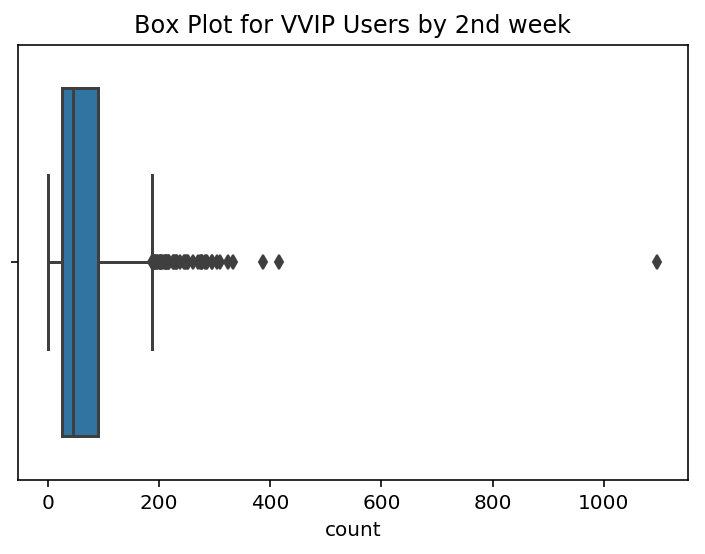

In [93]:
# outliers !! can be our vvip
print(vip['count'].describe())
sns.boxplot(data=vip, x="count")
#  outlier ==> VVIP (count > 200) 
ax = plt.gca()
ax.set_title("Box Plot for VVIP Users by 2nd week")
plt.savefig("VVIPs_are_outliers_2ndweek.png")

In [94]:
# vvip 
vvip_two = vip[vip["count"] > 200]
vvip_two.shape

(46, 4)

In [95]:
vip_two = vip.iloc[46:123]
print(vip_two.shape)

(77, 4)


In [96]:
# Get user id for VVIP and VIP at week 2
# we can make adds for VVIP and VIP at week 2
vip_n_user = vip_two.n_user_id.unique()
vip_ID_week_two = week_two.loc[week_two["n_user_id"].isin(vip_n_user),'ID'].unique()
vvip_n_user = vvip_two.n_user_id.unique()
vvip_ID_week_two = week_two.loc[week_two["n_user_id"].isin(vvip_n_user),'ID'].unique()
print("Total VVIP: ", len(vvip_ID_week_two))
print("Total VIP: ", len(vip_ID_week_two))

Total VVIP:  46
Total VIP:  77


### Get user ids for VVIP & VIP starting at week 3

In [97]:
#vip_week_three
stay_5_weeks = week_three.loc[week_three['play_week_n'] > 4, "n_user_id"].unique()
#vip_week_three
vip = week_three[week_three["n_user_id"].isin(stay_5_weeks)]

vip=vip.groupby(["n_user_id"]).sum().sort_values(by="count", ascending=False).reset_index()
vip.shape
# top 10% 67

(667, 4)

count    667.000000
mean      59.184408
std       63.731752
min        1.000000
25%       18.000000
50%       37.000000
75%       84.500000
max      827.000000
Name: count, dtype: float64


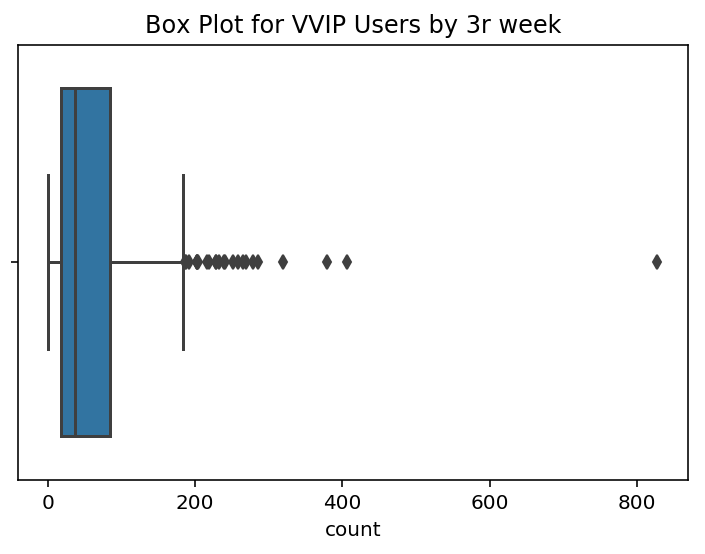

In [98]:
# outliers can be our vvip
print(vip['count'].describe())
sns.boxplot(data=vip, x="count")
#  outlier ==> VVIP (count > 200) 
ax = plt.gca()
ax.set_title("Box Plot for VVIP Users by 3r week")
plt.savefig("VVIPs_are_outliers_3rdweek.png")

In [99]:
# vvip 
vvip_three = vip[vip["count"] > 200]
# vip group 
vip_three = vip.iloc[21:67]
print(vvip_three.shape, vip_three.shape)

(21, 4) (46, 4)


In [100]:
# get user id for vip and vvip

vip_n_user = vip_three.n_user_id.unique()
vip_ID_week_three = week_three.loc[week_three["n_user_id"].isin(vip_n_user),'ID'].unique()
vvip_n_user = vvip_three.n_user_id.unique()
vvip_ID_week_three = week_three.loc[week_three["n_user_id"].isin(vvip_n_user),'ID'].unique()
print("Total VVIP: ", len(vvip_ID_week_three))
print("Total VIP: ", len(vip_ID_week_three))

Total VVIP:  21
Total VIP:  46


In [101]:
# VVIP & VIP Users by week 2 and week3 
print(vvip_ID_week_two[:5])
print(vvip_ID_week_three[:5])

['ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768-6d9d2b9c3e3cdc8e7a57d5f851e7faf44163f8d'
 'ASP-122a358d-be37-49bf-98ea-402ccfe33898-27216-b108177bf95df64ba6251d0cfc0ba72c676792a'
 'ASP-122a358d-be37-49bf-98ea-402ccfe33898-30574-d3cf10d679f5a18824f4e3d74f9b69b82ab278b'
 'ASP-189e47ef-a13b-435b-b636-1e34fae8990f-27854-dc4a938147c3b3bad835360f021f577275a8b0e'
 'ASP-2976399b-3a98-4712-bc5d-c0942b7754dc-30434-26a440054f6a202db6a0b7293a8d30c5d7988be']
['ASP-1ebfd48c-3e66-4585-859a-c79aee4d3e2d-2565-708d27fb36fd7259b0d6b18a7512142ba325cb1'
 'ASP-2e8f9011-6998-42c7-a656-76c80e784dcb-2183-fe88dfcf991e535261290fba42da2188b20dafe'
 'ASP-2e8f9011-6998-42c7-a656-76c80e784dcb-811-98fdcce57e6ae16a771f8382f0c95df53e5a2a5'
 'ASP-3074278c-daa2-4840-b165-337765c4a2b8-1084-7c996e8016a75d09192d0ae816f341b01077133'
 'ASP-3074278c-daa2-4840-b165-337765c4a2b8-1232-a172a494db7504bde68ed1f798f9447ebf7e2e5']


In [102]:
print(vip_ID_week_two[:5])
print(vip_ID_week_three[:5])

['EZ-122a358d-be37-49bf-98ea-402ccfe33898-29958-4a54a8a0e33cbe2d2999a8a30987fe779d57f06'
 'EZ-122a358d-be37-49bf-98ea-402ccfe33898-30039-4efe7db581ca44721059cffa096d75d9866f4d0'
 'EZ-37ddc099-6f2e-4988-94e1-c12886a1200a-27109-70e7fb94cb97a6654eaa5d4797f115a0ea03d48'
 'EZ-3fb665b8-fb6c-499d-8c1a-1676f25996fe-29999-2a9a3cfe86572a187d2c1f842e80481916eebab'
 'EZ-47ee5eef-b687-4707-bf58-2c7bc094041f-25054-27f5a9264d590237fbfdad05399baf1ae435f05']
['EZ-1ebfd48c-3e66-4585-859a-c79aee4d3e2d-2818-4984f5e97368cc7a8a0456a6ef9c67ee91dea35'
 'EZ-2719bdf0-17fb-4788-94ba-90918e98500b-1723-45361f93f9f74175fc82ba0cde48658839034e9'
 'EZ-2e8f9011-6998-42c7-a656-76c80e784dcb-2057-033bcf75e9593ecf95ebc4aa0a76354916e7c3c'
 'EZ-3074278c-daa2-4840-b165-337765c4a2b8-1018-8e0b75bfd2ac44ad803bc4024e5a701a2b5ee7d'
 'EZ-3074278c-daa2-4840-b165-337765c4a2b8-2886-d37e2dbe750c4b9b985e643b2398109c834f80a']


### See the pattern by day of starting at week at week 2

In [103]:
# day of week
week_two['play_dayOfweek'] = week_two['Play_Date'].dt.day_name()
week_two.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,First_Play_Date,Play_Date,Genre,count,n_user_id,first_week_n,play_week_n,play_dayOfweek
0,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0,2,2,Thursday
1,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0,2,2,Thursday
2,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0,2,2,Thursday
3,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0,2,2,Thursday
4,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0,2,2,Thursday


In [104]:
# weekend day added / would like to check by weekend or not.
week_two.loc[week_two["play_dayOfweek"].str.contains('Sunday|Saturday'), "is_it_weekend"] = True
week_two.loc[~(week_two["play_dayOfweek"].str.contains('Sunday|Saturday')), "is_it_weekend"] = False
week_two.loc[week_two['Play_Date'] == "2015-01-19", "is_it_weekend" ] = True  # Martin Luter day 
week_two.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,ID,First_Play_Date,Play_Date,Genre,count,n_user_id,first_week_n,play_week_n,play_dayOfweek,is_it_weekend
0,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0,2,2,Thursday,False
1,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0,2,2,Thursday,False
2,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0,2,2,Thursday,False
3,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0,2,2,Thursday,False
4,ASP-122a358d-be37-49bf-98ea-402ccfe33898-26768...,2015-01-08,2015-01-08,Discovery,1,0,2,2,Thursday,False


                count      rate
play_dayOfweek                 
Monday          12529  0.135959
Tuesday         12099  0.131293
Wednesday       13529  0.146810
Thursday        14040  0.152355
Friday          13300  0.144325
Saturday        13787  0.149610
Sunday          12869  0.139648
Avg:  0.14285714285714285


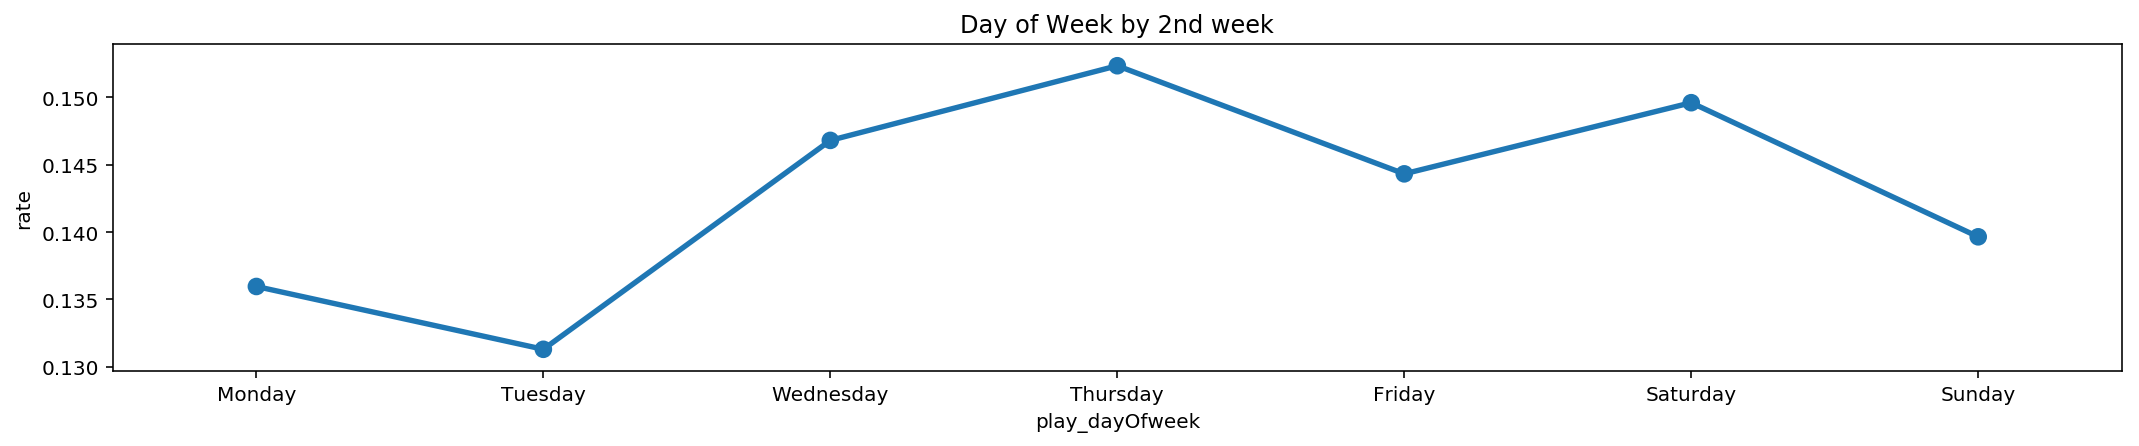

In [105]:
# day of week graph
day_of_week_two=week_two.pivot_table(values='count', index='play_dayOfweek', aggfunc='count')
dayname = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_of_week_two=day_of_week_two.loc[dayname]
day_of_week_two['rate'] = day_of_week_two['count'] / day_of_week_two['count'].sum()
plt.figure(figsize=(18,3))
sns.pointplot(data=day_of_week_two, x=day_of_week_two.index, y="rate" )
print(day_of_week_two)
print("Avg: ", day_of_week_two['rate'].mean())
ax = plt.gca()
ax.set_title("Day of Week by 2nd week")
plt.savefig("Day_of_week_2ndweek.png")

### See the pattern by day of week at week 3

In [106]:
# day of week
week_three['play_dayOfweek'] = week_three['Play_Date'].dt.day_name()
week_three.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,First_Play_Date,Play_Date,Genre,count,n_user_id,first_week_n,play_week_n,play_dayOfweek
897,ASP-1ebfd48c-3e66-4585-859a-c79aee4d3e2d-2565-...,2015-01-13,2015-01-13,Discovery,1,4,3,3,Tuesday
898,ASP-1ebfd48c-3e66-4585-859a-c79aee4d3e2d-2565-...,2015-01-13,2015-01-13,Fingerprint,1,4,3,3,Tuesday
899,ASP-1ebfd48c-3e66-4585-859a-c79aee4d3e2d-2565-...,2015-01-13,2015-01-13,Discovery,1,4,3,3,Tuesday
900,ASP-1ebfd48c-3e66-4585-859a-c79aee4d3e2d-2565-...,2015-01-13,2015-01-13,Discovery,1,4,3,3,Tuesday
901,ASP-1ebfd48c-3e66-4585-859a-c79aee4d3e2d-2565-...,2015-01-13,2015-01-13,Fingerprint,1,4,3,3,Tuesday


In [107]:
# weekend day added / would like to check by weekend or not.
week_three.loc[week_three["play_dayOfweek"].str.contains('Sunday|Saturday'), "is_it_weekend"] = True
week_three.loc[~(week_three["play_dayOfweek"].str.contains('Sunday|Saturday')), "is_it_weekend"] = False
week_three.loc[week_three['Play_Date'] == "2015-01-19", "is_it_weekend" ] = True  # Martin Luter day 
week_three.head()

,ID,First_Play_Date,Play_Date,Genre,count,n_user_id,first_week_n,play_week_n,play_dayOfweek,is_it_weekend
897,ASP-1ebfd48c-3e66-4585-859a-c79aee4d3e2d-2565-...,2015-01-13,2015-01-13,Discovery,1,4,3,3,Tuesday,False
898,ASP-1ebfd48c-3e66-4585-859a-c79aee4d3e2d-2565-...,2015-01-13,2015-01-13,Fingerprint,1,4,3,3,Tuesday,False
899,ASP-1ebfd48c-3e66-4585-859a-c79aee4d3e2d-2565-...,2015-01-13,2015-01-13,Discovery,1,4,3,3,Tuesday,False
900,ASP-1ebfd48c-3e66-4585-859a-c79aee4d3e2d-2565-...,2015-01-13,2015-01-13,Discovery,1,4,3,3,Tuesday,False
901,ASP-1ebfd48c-3e66-4585-859a-c79aee4d3e2d-2565-...,2015-01-13,2015-01-13,Fingerprint,1,4,3,3,Tuesday,False


                count      rate
play_dayOfweek                 
Monday           5795  0.135407
Tuesday          7937  0.185457
Wednesday        7892  0.184405
Thursday         6162  0.143982
Friday           5305  0.123957
Saturday         4995  0.116714
Sunday           4711  0.110078
Avg:  0.14285714285714285


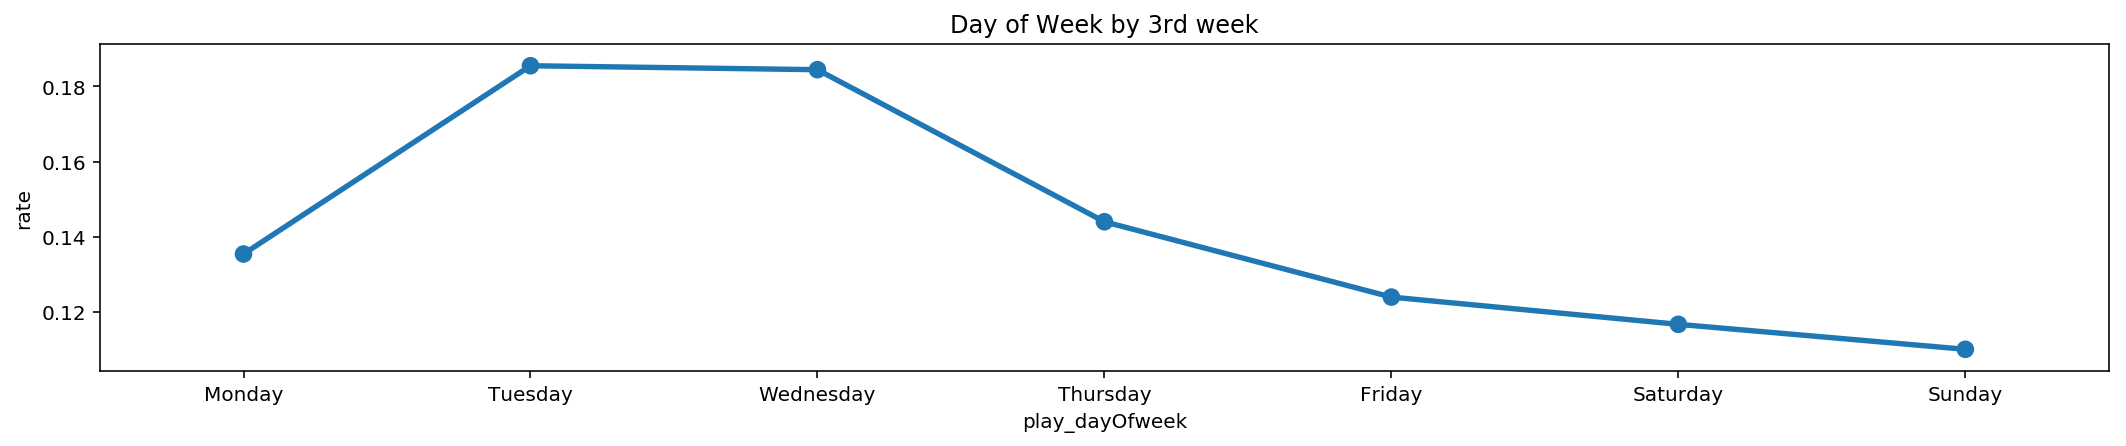

In [108]:
# day of week graph
# Tuesday, Wednesday High !! 
day_of_week_three=week_three.pivot_table(values='count', index='play_dayOfweek', aggfunc='count')
dayname = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_of_week_three=day_of_week_three.loc[dayname]
day_of_week_three['rate'] = day_of_week_three['count'] / day_of_week_three['count'].sum()
plt.figure(figsize=(18,3))
sns.pointplot(data=day_of_week_three, x=day_of_week_three.index, y="rate" )
print(day_of_week_three)
print("Avg: ", day_of_week_three['rate'].mean())
ax = plt.gca()
ax.set_title("Day of Week by 3rd week")
plt.savefig("Day_of_week_3rdweek.png")

In [109]:
# check weekend data
weekend_three = week_three.pivot_table(values='count', index='is_it_weekend', aggfunc='count')
weekend_three

,count
is_it_weekend,
False,31310
True,11487


### Find cutomers only playing Discovery and Fingerprint.

### Starting at week 2

In [110]:
# create index that customers only played Discovery and Fingerprint starting at week 2
zero_genre =(user_week2["Bullseye"] == 0) & (user_week2["Mashboard"] == 0) & (user_week2["Product"] == 0) & (user_week2["Spider"] == 0) 

In [111]:
# get usder ids that customers only played Discovery and Fingerprint starting at week 2
zero_user = pd.DataFrame(user_week2[zero_genre].groupby("n_user_id")['play_week_n'].sum()).reset_index().sort_values(by="play_week_n", ascending=False)

In [112]:
# get user id played for 5 weeks 
stay_5_weeks = week_two.loc[week_two['play_week_n'] > 4, "n_user_id"].unique()

In [113]:
a=user_week2[zero_genre]
b=a[a["n_user_id"].isin(stay_5_weeks)]

In [114]:
c=pd.DataFrame(b.groupby("n_user_id")['play_week_n'].sum()).reset_index().sort_values(by="play_week_n", ascending=False)

In [115]:
#165
c.loc[c['play_week_n'] >= 20, "n_user_id"].unique()

array([2797, 2170, 2147,  352,  752, 2114,  366, 2105,  370, 2094, 2068,
       2064, 2057, 2050, 2048, 1996, 1979, 1954, 1898, 1847, 1785,  444,
        446,  447, 1766, 2166, 2174, 2320,  322, 2315, 2293,  276, 2290,
       2281, 2277, 2275, 2269, 2268, 2267, 2263, 2260, 2249, 2248, 2242,
        302, 2219, 2216, 2214, 2212, 2210, 2189, 2183, 1746, 1745, 1727,
       1713,  645, 1467, 1466, 1458, 1457, 1456,  675,  680, 1454,  686,
       1427, 1426, 1419, 1390, 1386, 1383, 1380, 1077, 1008,  723,  725,
        737,  920, 1471, 1473, 1475, 1585, 1687, 1682,  481, 1677,  516,
       1649, 1643, 1638, 1597, 1587, 1579,  617, 1578, 1576,  567, 1550,
       1540, 1527,  607, 1517,  611, 1490, 2317, 2131, 2635, 2576,   22,
         26, 2710, 2702,   49, 2652,   53,  191,   56, 2619, 2399, 2603,
       2401, 2407, 2555,   21, 2415, 2544, 2543, 2438, 2538, 2528, 2462,
       2527, 2464, 2465, 2502,  141, 2498, 2497, 2387, 2467, 2383, 2367,
        239, 2348, 2352, 2353, 2354, 2329,   12, 23

In [116]:
zero_user_week2 = np.array(c.loc[c['play_week_n'] >=20, "n_user_id"].unique())
print(zero_user_week2.shape)
zero_user_week2

(165,)


array([2797, 2170, 2147,  352,  752, 2114,  366, 2105,  370, 2094, 2068,
       2064, 2057, 2050, 2048, 1996, 1979, 1954, 1898, 1847, 1785,  444,
        446,  447, 1766, 2166, 2174, 2320,  322, 2315, 2293,  276, 2290,
       2281, 2277, 2275, 2269, 2268, 2267, 2263, 2260, 2249, 2248, 2242,
        302, 2219, 2216, 2214, 2212, 2210, 2189, 2183, 1746, 1745, 1727,
       1713,  645, 1467, 1466, 1458, 1457, 1456,  675,  680, 1454,  686,
       1427, 1426, 1419, 1390, 1386, 1383, 1380, 1077, 1008,  723,  725,
        737,  920, 1471, 1473, 1475, 1585, 1687, 1682,  481, 1677,  516,
       1649, 1643, 1638, 1597, 1587, 1579,  617, 1578, 1576,  567, 1550,
       1540, 1527,  607, 1517,  611, 1490, 2317, 2131, 2635, 2576,   22,
         26, 2710, 2702,   49, 2652,   53,  191,   56, 2619, 2399, 2603,
       2401, 2407, 2555,   21, 2415, 2544, 2543, 2438, 2538, 2528, 2462,
       2527, 2464, 2465, 2502,  141, 2498, 2497, 2387, 2467, 2383, 2367,
        239, 2348, 2352, 2353, 2354, 2329,   12, 23

In [117]:
# get user ids only playing Discovery and Fingerprint starting at 2nd week
# 165
zero_user_week2 = week_two.loc[week_two['n_user_id'].isin(zero_user_week2),"ID"].unique()
print(zero_user_week2.shape)
zero_user_week2[:5]

(165,)


array(['ASP-2976399b-3a98-4712-bc5d-c0942b7754dc-30434-26a440054f6a202db6a0b7293a8d30c5d7988be',
       'ASP-37ddc099-6f2e-4988-94e1-c12886a1200a-25483-f4f84e9966df80bb65dd949ac5fffca1032ad41',
       'ASP-4a1d95b7-1692-4f74-9fd7-27e131f3df83-27844-e76d2a93298a53ff5c12a0d449ccd86633d5a8a',
       'ASP-4a1d95b7-1692-4f74-9fd7-27e131f3df83-30423-1d26da2e8ffd001bce87b52eb8ea0b4267f4dc4',
       'ASP-7c55c591-28bf-47bc-b5d3-b74d9d6b2e97-26115-025fbc43a3ac84331f727cead5a242718edf7df'],
      dtype=object)

### Starting at week 3

In [118]:
zero_genre =(user_week3["Bullseye"] == 0) & (user_week3["Mashboard"] == 0) & (user_week3["Product"] == 0) & (user_week3["Spider"] == 0) 

In [119]:
# get user id played for 5 weeks 
stay_5_weeks = week_three.loc[week_three['play_week_n'] > 4, "n_user_id"].unique()

In [120]:
a=user_week3[zero_genre]
b=a[a["n_user_id"].isin(stay_5_weeks)]
c=pd.DataFrame(b.groupby("n_user_id")['play_week_n'].sum()).reset_index().sort_values(by="play_week_n", ascending=False)

In [121]:
zero_user_week3 = np.array(c.loc[c['play_week_n'] >= 20, "n_user_id"].unique())
zero_user_week3

array([1481, 2552, 1933, 1461,  735, 1696, 1966, 1534,  523, 1617, 2192,
        640, 2305,   10, 2137, 2373, 1973, 1507, 2009, 2254, 2104, 2711,
       1411, 2550,   15, 2236, 1926,  325,  583,  598, 1816, 2549, 2448,
       1531, 1401, 2163, 2175, 2178, 1400, 2511,  251, 1520,   46, 2302,
       2304,   24, 1574])

In [122]:
# get user ids only playing Discovery and Fingerprint starting at 3rd week
# 47
zero_user_week3 = week_three.loc[week_three['n_user_id'].isin(zero_user_week3),"ID"].unique()
print(zero_user_week3.shape)
zero_user_week3[:5]

(47,)


array(['ASP-3074278c-daa2-4840-b165-337765c4a2b8-3044-29856956b3fc26a2b9e3c8ea8427a5dac5ad733',
       'ASP-3dfc00a6-3076-4704-9be7-dc3d38a6d2cc-3070-faf8c5be7eda008ad856ab421e25d0cbcfa81a4',
       'ASP-6cb17b42-f52c-494c-8d68-506810a31add-2496-10e3703fdd11f5c5953f0ea34551d19a66ce0ce',
       'ASP-c58b949c-174e-4e7a-b1cf-9494148cfd67-2875-17b446be05677e2e5d1fa5082b9be35c1709184',
       'BLN-405445b7-d087-463f-9d84-3ec48774cbc2-3655-09a388b0227ebc758fd4f8919be1d337e9d97fe'],
      dtype=object)